In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [89]:
df=pd.read_csv('train.csv')

C:\Users\Souai\AppData\Local\Temp\ipykernel_21440\3155070436.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


In [4]:
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [90]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [91]:
df.drop(['ID', 'Customer_ID', 'Month','Name','SSN', 'Credit_Mix','Credit_History_Age', 'Payment_Behaviour', 'Changed_Credit_Limit', 'Monthly_Balance', 'Type_of_Loan'],axis=1,inplace=True)

In [37]:
df.dtypes

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Num_Credit_Inquiries        float64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Credit_Score                 object
dtype: object

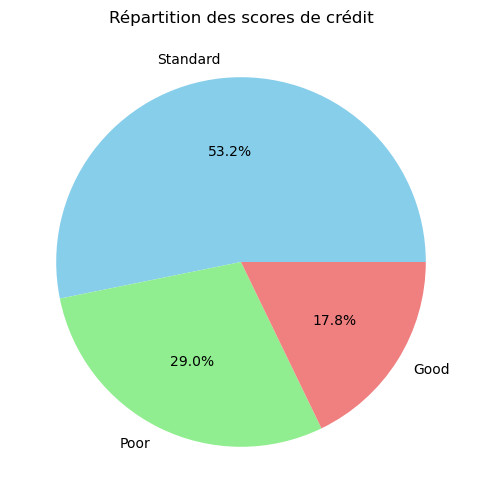

In [92]:
plt.figure(figsize=(8, 6))
df['Credit_Score'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Répartition des scores de crédit')
plt.ylabel('')
plt.show()

In [93]:
df['Age'] = df['Age'].str.replace('_', '', regex=False)
df['Age']=df['Age'].astype(int)

In [94]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '', regex=False)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)

In [95]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '', regex=False)
df['Annual_Income']=df['Annual_Income'].astype(float)

In [96]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '', regex=False)
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)

In [97]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '', regex=False)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float)

In [98]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '', regex=False)
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)

In [45]:
data = {}
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        data[col] = df[col].tolist()

df_data = pd.DataFrame(data)

<Axes: >

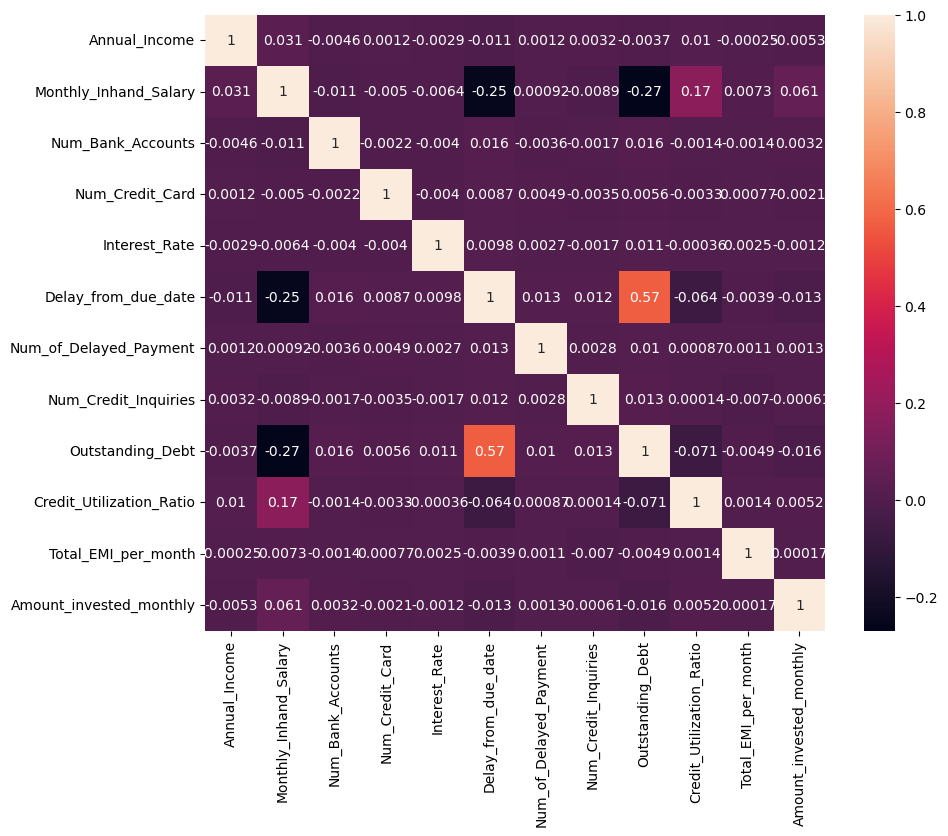

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_data.corr(), annot=True, ax=ax)

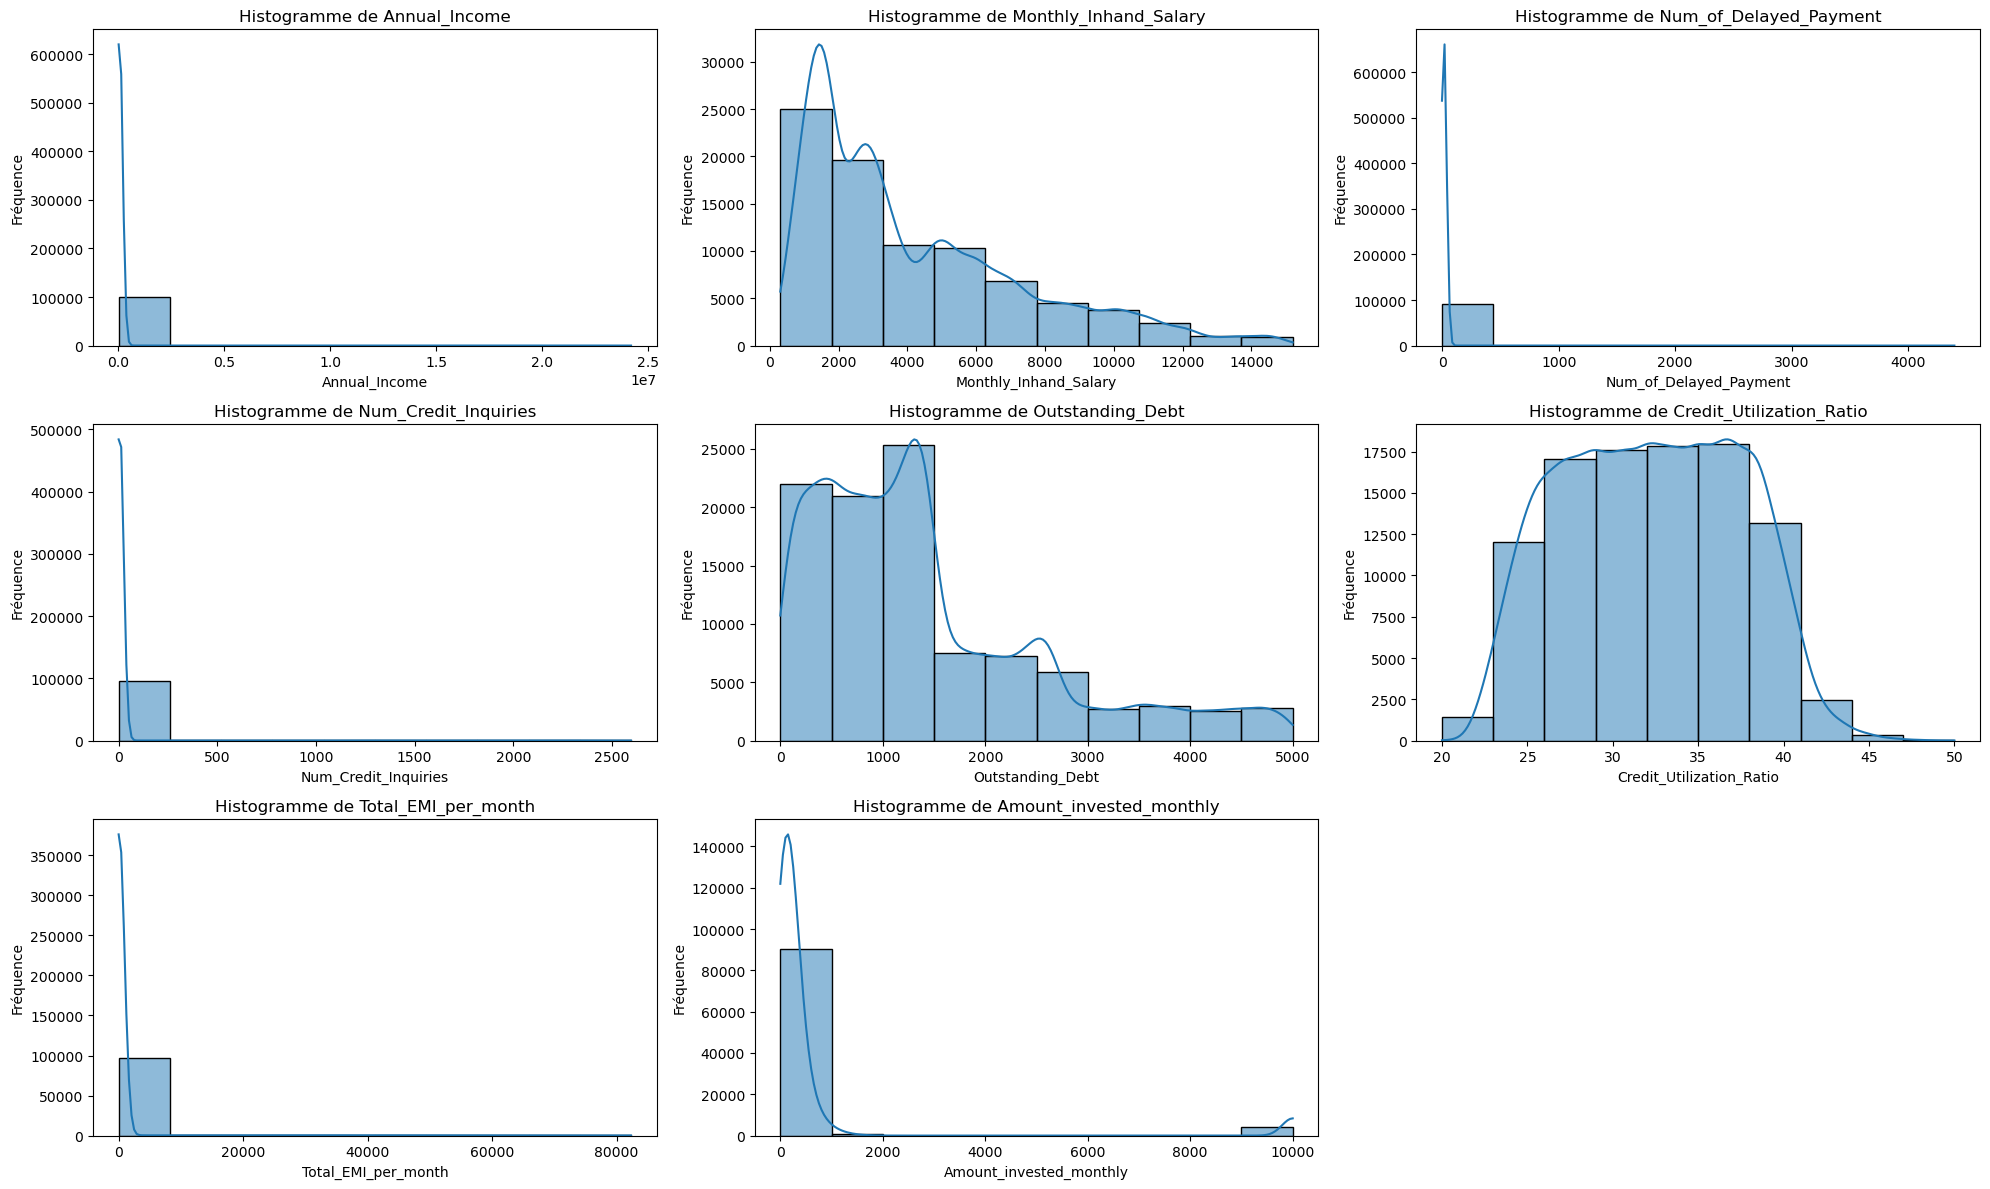

In [47]:
plt.figure(figsize=(20, 12))

num_plots = len(df.columns[df.dtypes.isin(['int64', 'float64'])])  
rows = num_plots // 3 + (num_plots % 3 > 0) 

for i, column in enumerate(df.columns[df.dtypes.isin(['int64', 'float64'])]):
    plt.subplot(rows, 3, i + 1)  
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [19]:
df.Payment_of_Min_Amount.unique()        

array(['No', 'NM', 'Yes'], dtype=object)

In [34]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [18]:
df.dtypes

Age                           int32
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Credit_Score                 object
dtype: object

In [99]:
df=df.dropna()

In [84]:
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Credit_Score                0
dtype: int64

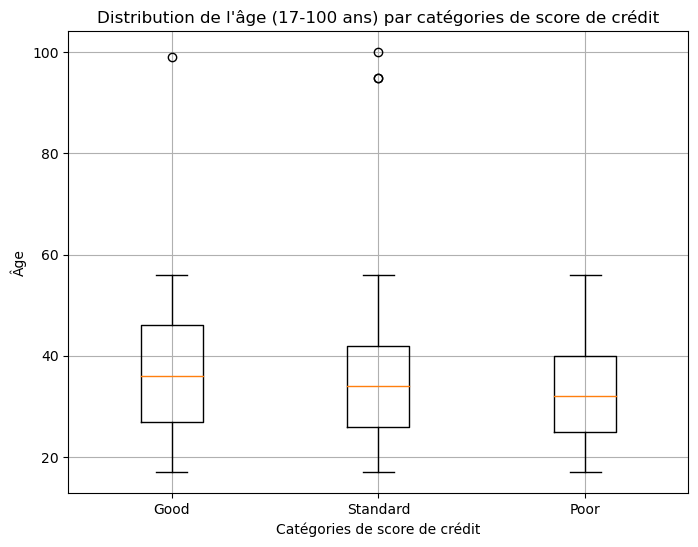

In [100]:
df_filtered = df[(df['Age'] >= 17) & (df['Age'] <= 100)]

plt.figure(figsize=(8, 6))
plt.boxplot([df_filtered[df_filtered['Credit_Score'] == 'Good']['Age'],
             df_filtered[df_filtered['Credit_Score'] == 'Standard']['Age'],
             df_filtered[df_filtered['Credit_Score'] == 'Poor']['Age']],
            labels=['Good', 'Standard', 'Poor'])
plt.xlabel('Catégories de score de crédit')
plt.ylabel('Âge')
plt.title('Distribution de l\'âge (17-100 ans) par catégories de score de crédit')
plt.grid(True)
plt.show()

In [101]:
df.drop(df[(df['Age'] < 17) | (df['Age'] > 60)].index, inplace=True)

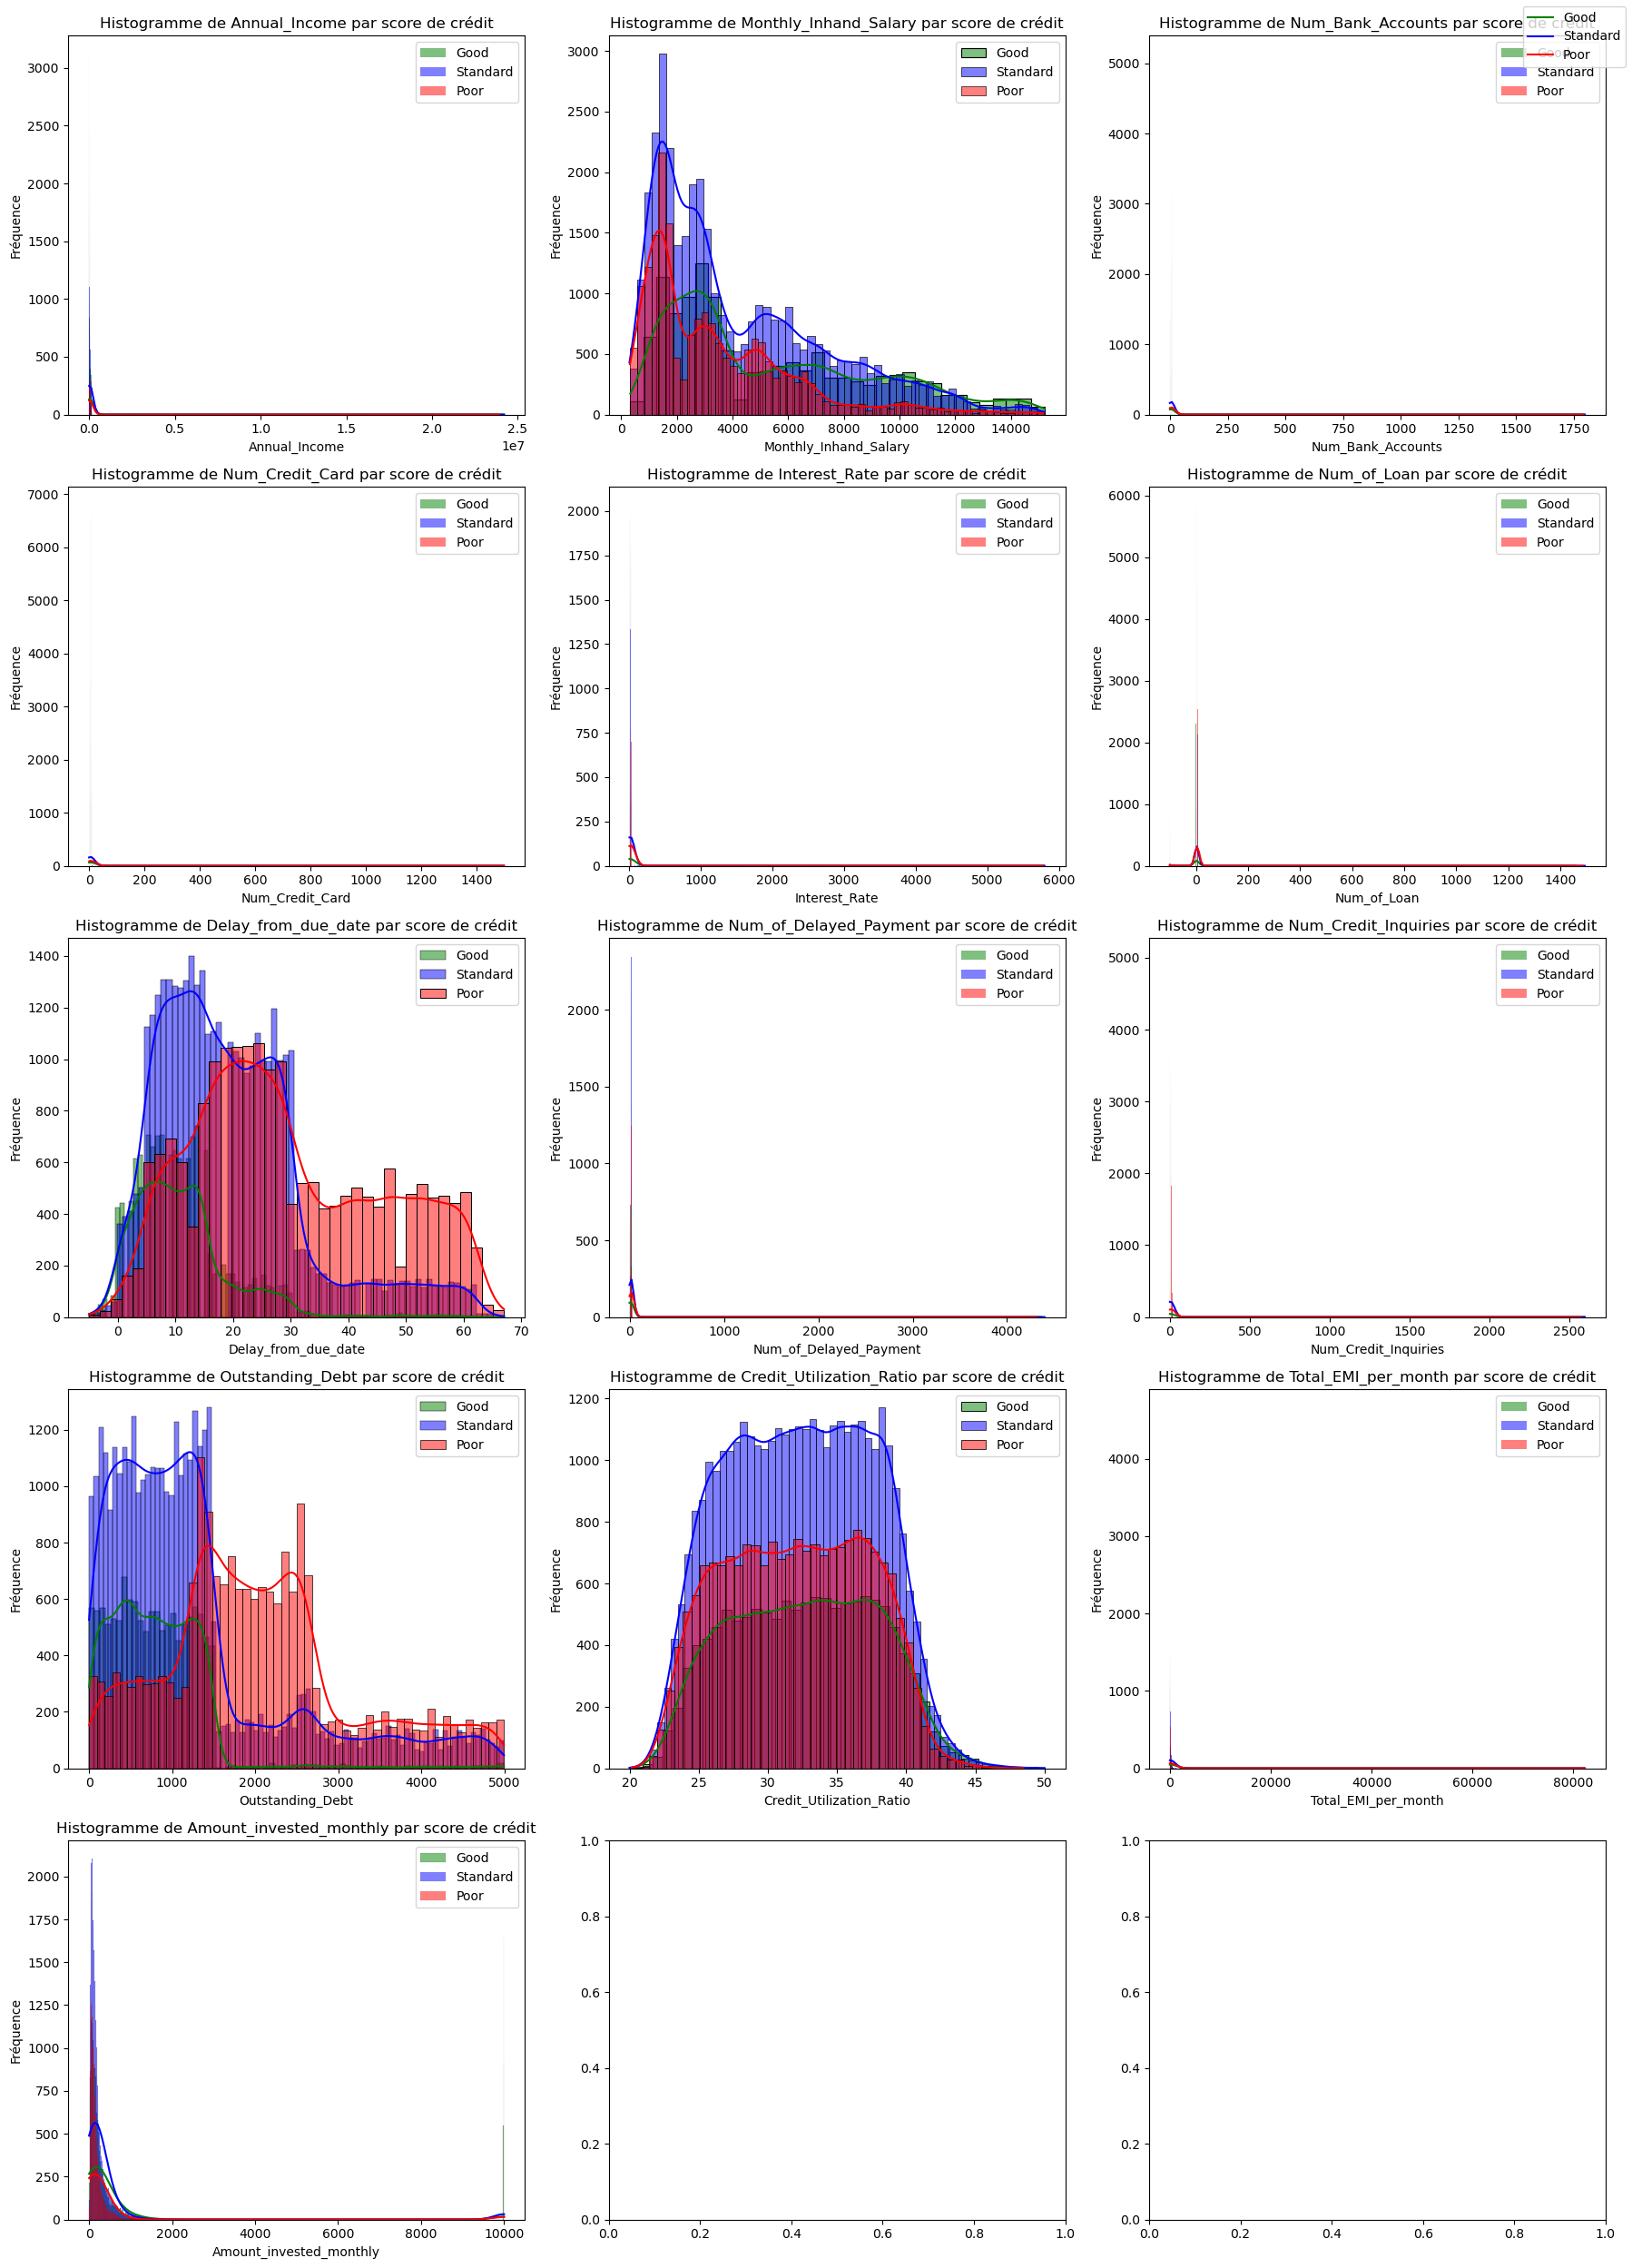

In [58]:
good_scores = df[df['Credit_Score'] == 'Good']
standard_scores = df[df['Credit_Score'] == 'Standard']
poor_scores = df[df['Credit_Score'] == 'Poor']

numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                   'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                   'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
                   'Total_EMI_per_month', 'Amount_invested_monthly']

num_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

for i, column in enumerate(numeric_columns):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(good_scores[column], kde=True, ax=axes[row_idx, col_idx], color='green', label='Good')
    sns.histplot(standard_scores[column], kde=True, ax=axes[row_idx, col_idx], color='blue', label='Standard')
    sns.histplot(poor_scores[column], kde=True, ax=axes[row_idx, col_idx], color='red', label='Poor')

    axes[row_idx, col_idx].set_title(f'Histogramme de {column} par score de crédit')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Fréquence')
    axes[row_idx, col_idx].legend()

fig.legend(labels=['Good', 'Standard', 'Poor'], loc='upper right')

plt.tight_layout()
plt.show()

In [119]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df.head()


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,23,12,19114.12,1824.843333,3,4,3,4,3,7.0,4.0,809.98,26.822620,1,49.574949,80.415295,0
6,23,12,19114.12,1824.843333,3,4,3,4,3,8.0,4.0,809.98,22.537593,1,49.574949,178.344067,0
7,23,12,19114.12,1824.843333,3,4,3,4,3,6.0,4.0,809.98,23.933795,1,49.574949,24.785217,2
8,28,15,34847.84,3037.986667,2,4,6,1,3,4.0,2.0,605.03,24.464031,1,18.816215,104.291825,2
9,28,13,34847.84,3037.986667,2,4,6,1,7,1.0,2.0,605.03,38.550848,1,18.816215,40.391238,0


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [116]:
X = df.drop('Credit_Score', axis=1)  # Features
y = df['Credit_Score']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [118]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7863887274840209
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2542
           1       0.78      0.79      0.79      3861
           2       0.80      0.81      0.81      7365

    accuracy                           0.79     13768
   macro avg       0.78      0.77      0.77     13768
weighted avg       0.79      0.79      0.79     13768

